In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 42.9MB/s 
     |████████████████████████████████| 3.9MB 45.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5b6e2cfe9ddb3b8415903d9855f87f94ac0d1081d9a742b0db3a04201daa0485
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!git clone "https://github.com/laxmimerit/dog-cat-full-dataset"

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
test_data_dir = "/content/dog-cat-full-dataset/data/test"
train_data_dir = "/content/dog-cat-full-dataset/data/train"

In [0]:
# Image Rescaling due to avoid heavy computations 
img_width = 32
img_height = 32
img_channels = 3
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width,img_height),
                                              classes = ["dogs" , "cats"],
                                              class_mode = "binary",
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [10]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                              target_size = (img_width,img_height),
                                              classes = ["dogs" , "cats"],
                                              class_mode = "binary",
                                              batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [11]:
len(train_generator)* batch_size

20000

# Build CNN Base Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",
                 input_shape=(img_width,img_height,img_channels)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation= "relu",kernel_initializer="he_uniform"))  # Originally 4096
model.add(Dense(1,activation="sigmoid"))

In [14]:
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                              epochs=5,validation_data=validation_generator,
                              validation_steps=len(validation_generator),verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/5
1000/1000 [==============================] - 99s 99ms/step - loss: 0.6948 - accuracy: 0.5264 - val_loss: 0.6933 - val_accuracy: 0.4998
Epoch 2/5
1000/1000 [==============================] - 99s 99ms/step - loss: 0.6935 - accuracy: 0.4983 - val_loss: 0.6897 - val_accuracy: 0.5328
Epoch 3/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.6833 - accuracy: 0.5475 - val_loss: 0.6711 - val_accuracy: 0.5848
Epoch 4/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.6382 - accuracy: 0.6391 - val_loss: 0.5918 - val_accuracy: 0.6732
Epoch 5/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.5750 - accuracy: 0.6977 - val_loss: 0.5833 - val_accuracy: 0.6998


In [15]:
history.history

{'accuracy': [0.52635, 0.49825, 0.5475, 0.63905, 0.6977],
 'loss': [0.6947672270536422,
  0.693500307559967,
  0.6832912909984589,
  0.6382003388702869,
  0.574992761939764],
 'val_accuracy': [0.4998, 0.5328, 0.5848, 0.6732, 0.6998],
 'val_loss': [0.6932597875595092,
  0.6897149274349212,
  0.6711069822311402,
  0.591805837392807,
  0.5832962075471878]}

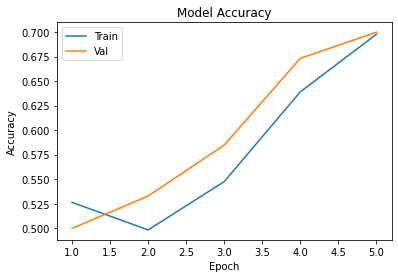

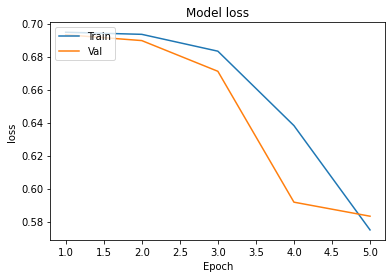

In [20]:
def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()

plot_learningCurve(history,5)  # We are underfitting here

# Implement the First 3 Blocks of VGG Model
## No Dropout or batch normalisation gives very bad validation accuracy

In [0]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",
                 input_shape=(img_width,img_height,img_channels)))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation= "relu",kernel_initializer="he_uniform"))  # Originally 4096
model.add(Dense(1,activation="sigmoid"))

In [22]:
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                              epochs=5,validation_data=validation_generator,
                              validation_steps=len(validation_generator),verbose=1)

  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/5
1000/1000 [==============================] - 171s 171ms/step - loss: 0.7322 - accuracy: 0.5024 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 171s 171ms/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6943 - val_accuracy: 0.4998
Epoch 3/5
1000/1000 [==============================] - 172s 172ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 174s 174ms/step - loss: 0.6934 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 171s 171ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5000


## After Batch Normalization and Dropout


In [0]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",
                 input_shape=(img_width,img_height,img_channels)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",kernel_initializer="he_uniform",))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation= "relu",kernel_initializer="he_uniform"))  # Originally 4096
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [26]:
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                              epochs=10,validation_data=validation_generator,
                              validation_steps=len(validation_generator),verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/10
1000/1000 [==============================] - 250s 250ms/step - loss: 0.5636 - accuracy: 0.7135 - val_loss: 1.0091 - val_accuracy: 0.5662
Epoch 2/10
1000/1000 [==============================] - 248s 248ms/step - loss: 0.5509 - accuracy: 0.7198 - val_loss: 0.5758 - val_accuracy: 0.6934
Epoch 3/10
1000/1000 [==============================] - 246s 246ms/step - loss: 0.5386 - accuracy: 0.7319 - val_loss: 0.5642 - val_accuracy: 0.7152
Epoch 4/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.5256 - accuracy: 0.7390 - val_loss: 0.6011 - val_accuracy: 0.6898
Epoch 5/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.5220 - accuracy: 0.7431 - val_loss: 0.5320 - val_accuracy: 0.7444
Epoch 6/10
1000/1000 [==============================] - 244s 244ms/step - loss: 0.5112 - accuracy: 0.7528 - val_loss: 0.5549 - val_accuracy: 0.7270
Epoch 7/10
1000/1

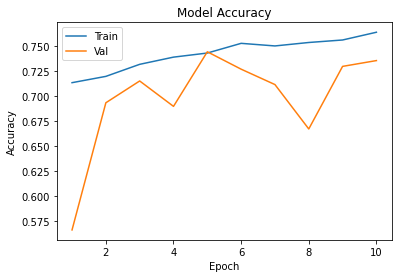

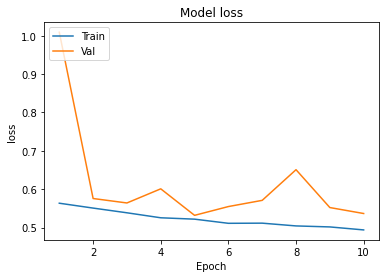

In [27]:
plot_learningCurve(history,10)